## Importing Libraries and setting-up environment

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('TSLA', data_source='yahoo', start='2010-06-28', end = "2019-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


## Correcting the Dataset

In [5]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


## Visualizing the Data

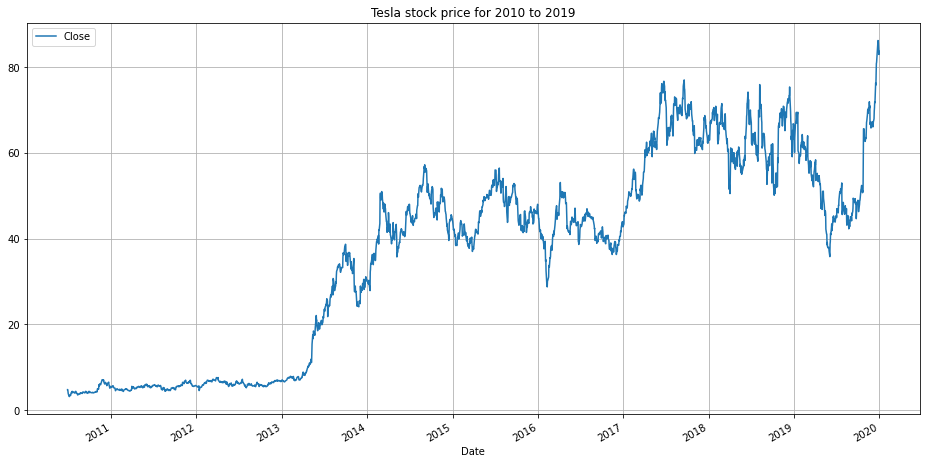

In [6]:
df.plot(figsize=(16,8), title = "Tesla stock price for 2010 to 2019", grid = True)

- No seasonality visible
- No stationarity visible

In [7]:
df.describe()

,Close
count,2394.000000
mean,36.630692
std,22.898366
min,3.160000
25%,6.866500
50%,42.319000
75%,52.777999
max,86.188004


## Calculations

In [8]:
from statsmodels.tsa.stattools import adfuller

X = df.values
result = adfuller(X)

print("ADF for original data")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF for original data
ADF Statistic: -0.911788
p-value: 0.784066
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


- Since p-value of ADF test is > 0.05, this shows that the data is non-stationary
- Hence, by the Dickey-Fuller test, the time series is unsurprisingly non-stationary

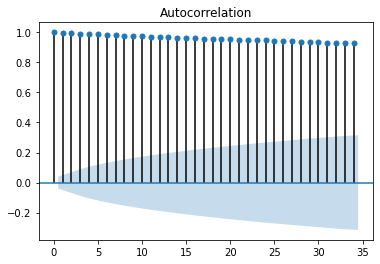

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df["Close"])
plt.show()

- Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
- Also, looking at the autocorrelation plot, we see that it is very high, and it seems that there is no clear seasonality.

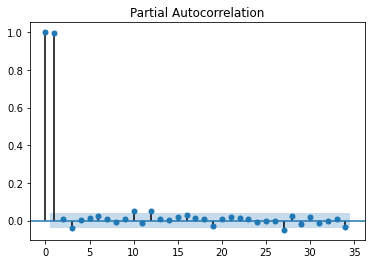

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df)
plt.show()

#### Therefore, to get rid of the high autocorrelation and to make the process stationary, let’s take the first difference. We simply subtract the time series from itself with a lag of one day

In [11]:
df_1 = df.diff(periods = 1) #First difference

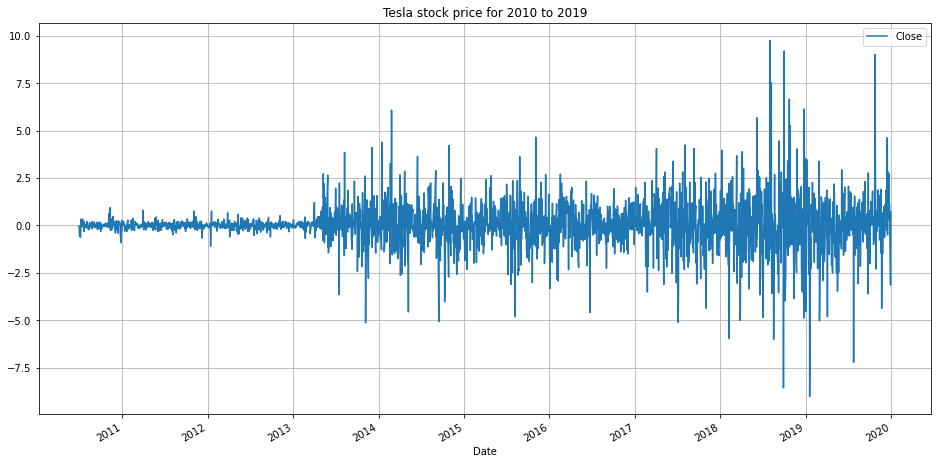

In [12]:
df_1.plot(figsize=(16,8), title = "Tesla stock price for 2010 to 2019", grid = True)

In [13]:
df_1.describe()

,Close
count,2393.000000
mean,0.032966
std,1.253018
min,-9.009998
25%,-0.332001
50%,0.012000
75%,0.458000
max,9.739998


In [12]:
from statsmodels.tsa.stattools import adfuller

X = df_1.values
result = adfuller(X[1:])

print("ADF for original data")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF for original data
ADF Statistic: -49.169797
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


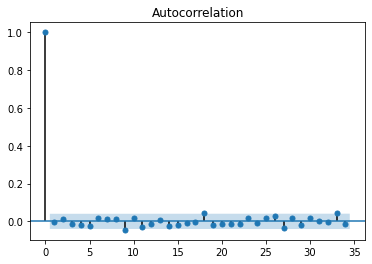

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_1["Close"][1:])
plt.show()

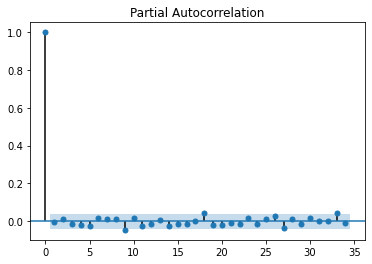

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_1[1:])
plt.show()

#### Awesome! Our series is now stationary and we can start modelling!

In [14]:
df_2 = df.diff(periods = 2) #Second difference

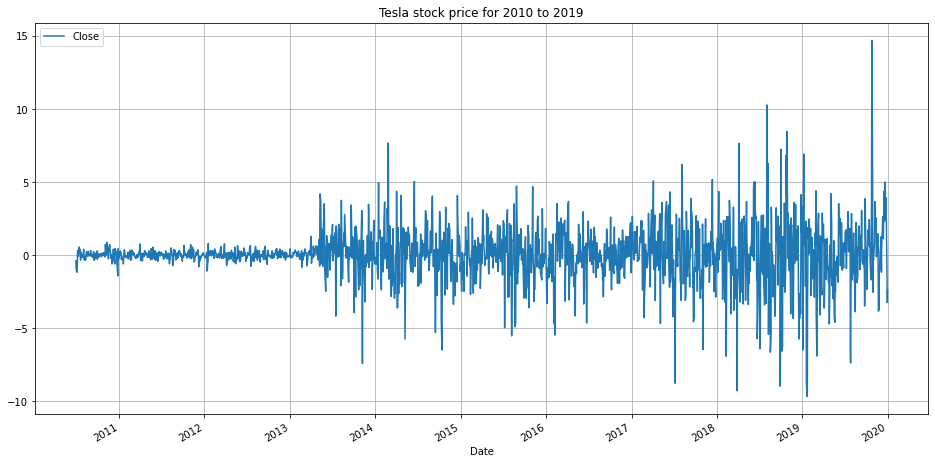

In [15]:
df_2.plot(figsize=(16,8), title = "Tesla stock price for 2010 to 2019", grid = True)

In [16]:
df_2.describe()

,Close
count,2392.000000
mean,0.065661
std,1.767185
min,-9.677998
25%,-0.475999
50%,0.053999
75%,0.751000
max,14.689999


In [43]:
from statsmodels.tsa.stattools import adfuller

X = df_2.values
result = adfuller(X[2:])

print("ADF for original data")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF for original data
ADF Statistic: -9.521254
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


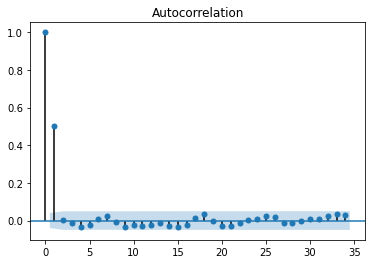

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_2["Close"][2:])
plt.show()

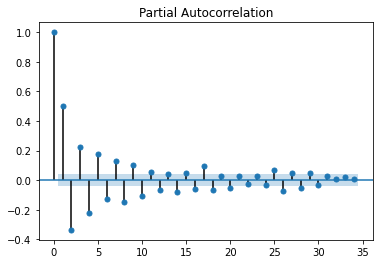

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_2[2:])
plt.show()

## White Noise

In [34]:
df.describe()

,Close
count,2394.000000
mean,36.630692
std,22.898366
min,3.160000
25%,6.866500
50%,42.319000
75%,52.777999
max,86.188004


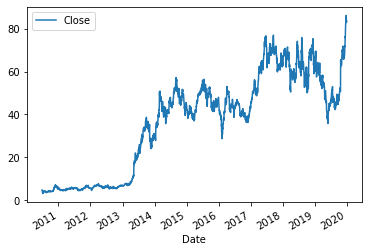

In [35]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279A499F2C8>]],
      dtype=object)

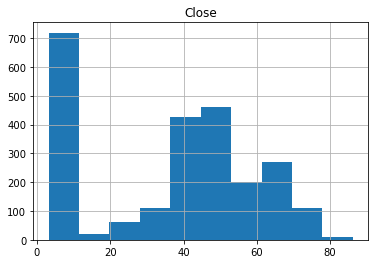

In [36]:
df.hist()

- Hence not White Noise

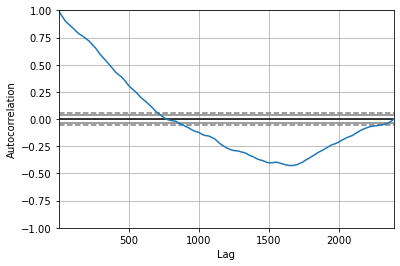

In [40]:
pd.plotting.autocorrelation_plot(df)

Made by: Hari N. Khatavkar

Credits:
- https://machinelearningmastery.com/time-series-data-stationary-python/
- https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/
- https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0
- https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
- https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775